In [2]:
%autosave 60

Autosaving every 60 seconds


# Setup

In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
print(tf.__version__)
from keras.callbacks import CSVLogger

2.4.1


## Dataset Preparation

In [4]:
(img_train, label_train), (img_test, label_test)= keras.datasets.cifar10.load_data()

In [5]:
## lets check the number of train/test images
print('No of train images: ', img_train.shape)
print('No of test images: ', img_test.shape)
print('label format for trainig:', label_train.shape)
print('label format for testing:', label_test.shape)
print('unique lables are :', np.unique(label_train))

No of train images:  (50000, 32, 32, 3)
No of test images:  (10000, 32, 32, 3)
label format for trainig: (50000, 1)
label format for testing: (10000, 1)
unique lables are : [0 1 2 3 4 5 6 7 8 9]


In [6]:
## Normalize the dataset
img_train = img_train / 255.0
img_test = img_test / 255.0

In [7]:
#img_train = img_train.reshape(list(img_train.shape) + [1])
#img_test = img_test.reshape(list(img_test.shape) + [1])

# Normalize pixel values to be between 0 and 1
from tensorflow.keras.utils import to_categorical 
import numpy as np
label_train = to_categorical(label_train, len(np.unique(label_train)))
label_test = to_categorical(label_test, len(np.unique(label_test)))

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


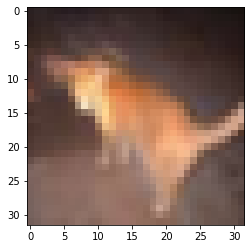

In [90]:
import matplotlib.pyplot as plt
Indx=342

plt.imshow(img_train[Indx])
print(label_train[Indx])

/home/pooja/.local/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:2265: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if v not in values:


ValueError: array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32) is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

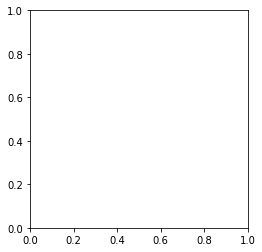

# Model defination

In [10]:
## As input, a CNN takes a shape (image_height, image_width, color_channels)
def create_model(dense_neurons=64, L1=0):
    model= tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(dense_neurons, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(l1=L1)),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [11]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                147520    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [12]:
csv_logger = CSVLogger('training_history.log', separator=',', append=False )
history = model.fit(img_train, label_train, epochs=20, callbacks=[csv_logger],
                        validation_data=(img_test, label_test))

Epoch 1/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.7217 - accuracy: 0.3679 - val_loss: 1.2475 - val_accuracy: 0.5578
Epoch 2/20
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1951 - accuracy: 0.5799 - val_loss: 1.1011 - val_accuracy: 0.6209
Epoch 3/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0231 - accuracy: 0.6391 - val_loss: 1.0406 - val_accuracy: 0.6343
Epoch 4/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9388 - accuracy: 0.6787 - val_loss: 0.9768 - val_accuracy: 0.6614
Epoch 5/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8601 - accuracy: 0.6995 - val_loss: 0.9690 - val_accuracy: 0.6662
Epoch 6/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.8116 - accuracy: 0.7174 - val_loss: 0.9207 - val_accuracy: 0.6858
Epoch 7/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7635 - accuracy: 0.7351 - val_loss: 0.9069 -

## Model Eveluation

In [18]:
score = model.evaluate(img_test, label_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]`)```

Test loss: 1.1185359954833984
Test accuracy: 0.6855000257492065


## plotting 

In [15]:
import sys
sys.path.append("/home/pooja/Documents/weiterbildung/deep-learning/coursera/tensorflow-developer-professional-specialization/tensor-flow-git/common_scripts_pool")

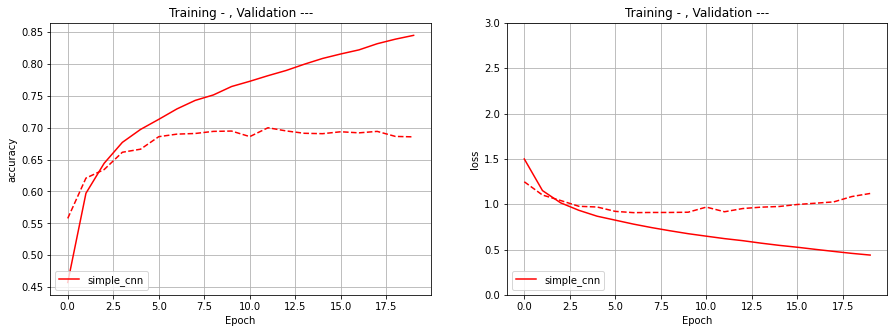

In [17]:
from ploting_script import plot_n_model
plot_n_model(num_history=1, name_history=[history], label_list=['simple_cnn'], ylim_low=0, ylim_high=3)

## Predicting image

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
True


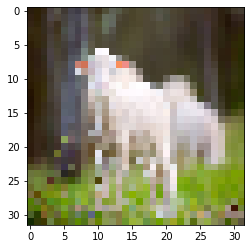

In [110]:
import numpy as np

#from google.colab import files                                                                                                                
from keras.preprocessing import image
from matplotlib.pyplot import imread
import scipy

image_name='sheep.jpg'
path = 'images/'+ image_name
img=image.load_img(path, target_size=(32, 32))                                                                                          
plt.imshow(img)
x=image.img_to_array(img)                                                                                                                 
x=np.expand_dims(x, axis=0)                                                                                                               
images = np.vstack([x])                                                                                                                   

classes = model.predict(images, batch_size=20)                                                                                            

print(classes[0])
print(classes[0].any())
#if classes[0]>0:                                                                                                                          
#    print(fn + " is a dog")                                                                                                                 
#else:                                                                                                                                     
#    print(fn + " is a cat")                                                                                                                 




## Saving model

In [1]:
model.history.history

NameError: name 'model' is not defined

In [22]:
model.save("cifar_h5_model.h5")

## Saving history

In [ ]:
try:
    import dill as pickle
except ImportError:
    import pickle
    
with open('trainHistoryDict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)


# Plotting history in new session

In [1]:
try:
    import dill as pickle
except ImportError:
    import pickle

new_history = pickle.load(open('trainHistoryDict', "rb"))

In [2]:
from ploting_script import  plot_n_model

Help on function plot_n_model in module ploting_script:

plot_n_model(n=2, model_history=[], ylim_low=0.4, ylim_high=1.0, label_list=[], leg_loc='lower left', is_saved_history=False)
    n: no of history to be plotted
    model_history : list of history name, ex [history_1, history_2]
    label_list : list of label names, ex ['simple_model', 'model_cnn']
    y_lim_low : lowest y scale
    y_lim_high : highest y scale
    leg_loc : location of legend ex: 'lower left', 'lower right', 'upper right', 'upper left'
    is_saved_history : if plotting saved history via pickle 
                     try:
                      import dill as pickle
                     except ImportError:
                        import pickle
                     with open('trainHistoryDict', 'wb') as file_pi:
                     pickle.dump(history.history, file_pi)
                     calling_saved_history = pickle.load(open('trainHistoryDict', "rb"))
    
    @usage::plot_n_model(n=2, model_history=[history1

<Figure size 432x288 with 0 Axes>

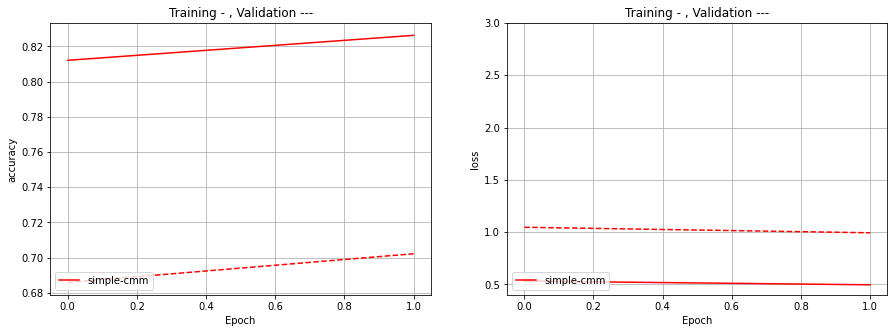

In [5]:
plot_n_model(n=1, model_history=[new_history], label_list=['simple-cmm'], is_saved_history=True, ylim_high=3)

# Calling H5 format back
Note : Keras also supports saving a single HDF5 file containing the model's architecture, weights values, and compile() information. It is a light-weight alternative to SavedModel.



In [23]:
reconstructed_model = keras.models.load_model("cifar_h5_model.h5")

In [24]:
reconstructed_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                147520    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [26]:
reconstructed_model.history.history ## Unfortunately empty!!!!

AttributeError: 'NoneType' object has no attribute 'history'

In [28]:
reconstructed_model.predict(img_test)

array([[2.3575064e-03, 4.7499835e-04, 1.8141937e-02, ..., 4.7868112e-04,
        1.3820591e-02, 3.0955710e-03],
       [8.3902188e-02, 1.9574019e-01, 1.7073404e-04, ..., 2.1897295e-06,
        6.4421302e-01, 7.5894304e-02],
       [5.4354127e-02, 4.6858424e-01, 6.1098179e-03, ..., 1.4322747e-03,
        3.0544794e-01, 1.5341224e-01],
       ...,
       [3.1993538e-04, 8.8946017e-06, 8.9617334e-02, ..., 3.6070876e-02,
        8.9900168e-05, 3.6756674e-04],
       [1.2420276e-02, 6.9622791e-01, 9.1827922e-03, ..., 7.0204623e-03,
        1.1230045e-03, 2.2305511e-02],
       [5.9909088e-04, 1.4925564e-03, 8.7260082e-03, ..., 8.4192073e-01,
        7.0585273e-05, 7.4452236e-03]], dtype=float32)

### Note
 The reconstructed model is already compiled and has retained the optimizer
 state, so training can resume:


In [38]:
reconstructed_model.fit(img_test, label_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.0611 - accuracy: 0.6318


# Ploting
1. not working, need to optimize it
2. I prefer pickle better

In [4]:
import json, codecs

def saveHist(path, history):
    with codecs.open(path, 'w', encoding='utf-8') as f:
        json.dump(history, f, separators=(',', ':'), sort_keys=True, indent=4)

def loadHist(path):
    n = {} # set history to empty                                                                                                              
    if os.path.exists(path): # reload history if it exists                                                                                     
        with codecs.open(path, 'r', encoding='utf-8') as f:
            n = json.loads(f.read())
    return n

def appendHist(h1, h2):
    print('h1', h1, '\n h2 :',h2)
    if h1 == {}:
        #print('h1 in loop:', h1)
        return h2
    else:
        print("h2 in loop: ", h2)
        print('h1 in sec loop', h1.history)
        dest = {}
        for key, value in h1.history.items():
            dest[key] = value + h2[key]
        return dest


# Comment
### Limitations
Compared to the SavedModel format, there are two things that don't get included in the H5 file:

1. **External losses & metrics** added via model.add_loss() & model.add_metric() are not saved (unlike SavedModel). If you have such losses & metrics on your model and you want to resume training, you need to add these losses back yourself after loading the model. Note that this does not apply to losses/metrics created inside layers via self.add_loss() & self.add_metric(). As long as the layer gets loaded, these losses & metrics are kept, since they are part of the call method of the layer.
2. **The computation graph of custom objects** such as custom layers is not included in the saved file. At loading time, Keras will need access to the Python classes/functions of these objects in order to reconstruct the model. See Custom objects.
